# Wetland water balance

- In this example we compare the water balances of a bare soil and a wetland, to estimate the effect of wetland vegatation on groundwater recharge.
- Data can be downloaded from https://github.com/SteenChr/edcrop/tree/main/docs/data/wetland and saved in a working directory.
- The working directory `wdir` can then be specified in the code block below.

In [1]:
from edcrop import edcrop
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

wdir = os.path.join(os.path.dirname(os.getcwd()))

os.chdir(os.path.join(wdir, 'data/wetland/'))

yaml = 'edcrop.yaml'

edcrop.run_model(yaml=yaml)

ModuleNotFoundError: No module named 'edcrop'

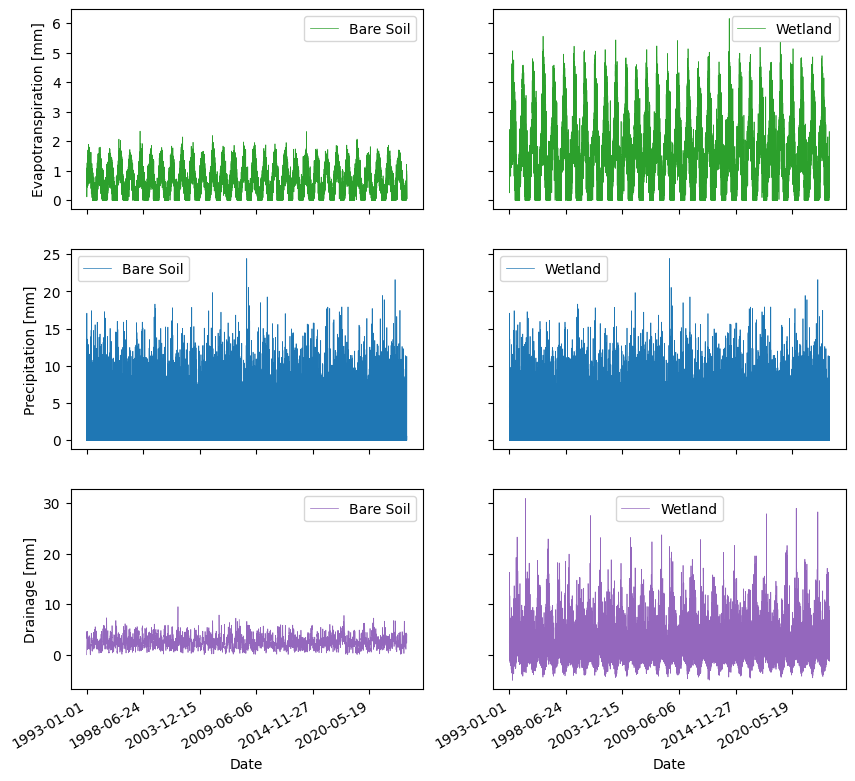

In [2]:
df = pd.read_csv('Station1_JB1_BS_ed_wb.out')
df.columns = df.columns.str.replace(' ', '')

df2 = pd.read_csv('Station1_JB1_WL_ed_wb.out')
df2.columns = df2.columns.str.replace(' ', '')

fig, axs = plt.subplots(3,2, sharex = 'col', sharey='row', figsize=(10,10))

df.plot.line(x='Date', y='Ea', ax=axs[0,0], c='C2', label='Bare Soil', lw=0.5)
df2.plot.line(x='Date', y='Ea', ax=axs[0,1], c='C2', label='Wetland', lw=0.5)
df.plot.line(x='Date', y='P', ax=axs[1,0], c='C0', label='Bare Soil', lw=0.5)
df2.plot.line(x='Date', y='P', ax=axs[1,1], c='C0', label='Wetland', lw=0.5)
df.plot.line(x='Date', y='Dsum', ax=axs[2,0], c='C4', label='Bare Soil', lw=0.5)
df2.plot.line(x='Date', y='Dsum', ax=axs[2,1], c='C4', label='Wetland', lw=0.5)

axs[0,0].set_ylabel('Evapotranspiration [mm]')
axs[1,0].set_ylabel('Precipitation [mm]')
axs[2,0].set_ylabel('Drainage [mm]')

fig.autofmt_xdate()